In [1]:
# Ejemplo pronóstico de serie temporal Univariada
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

Using TensorFlow backend.


In [2]:
df_dataset= pd.read_csv('datatraining_Occupancy.csv')
df_dataset.head()
# df_dataset.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


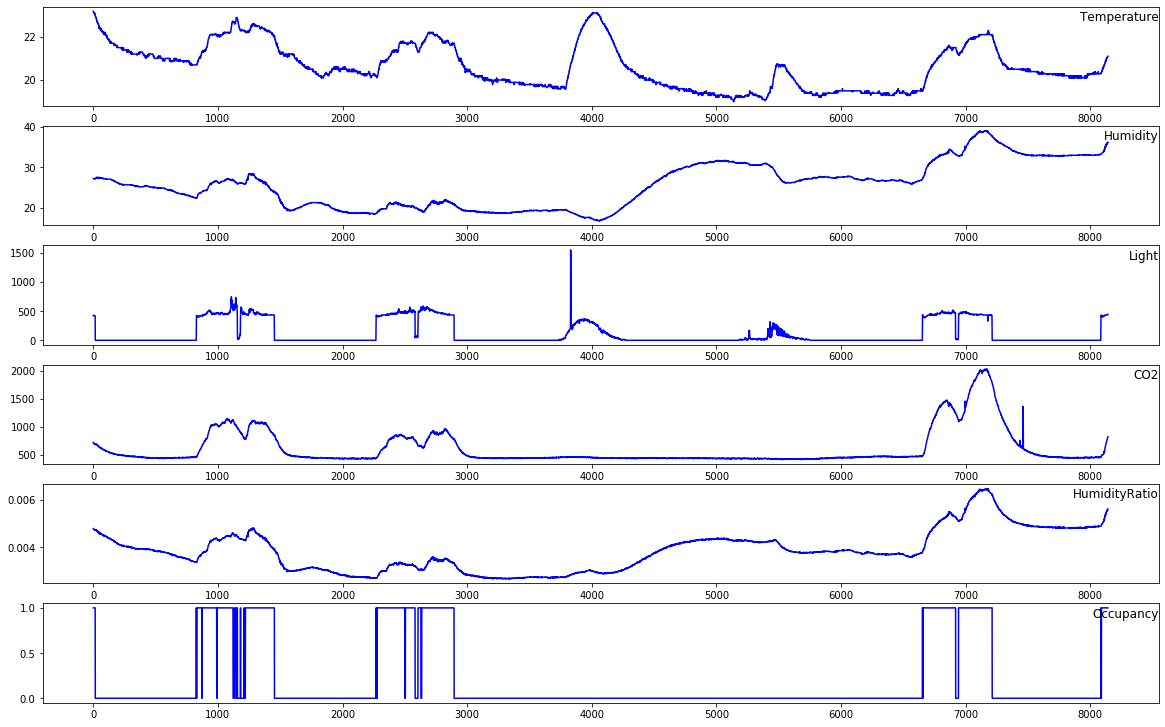

In [3]:
i = 1
# plot each column
plt.figure(figsize=(20, 15))
for counter in range(1,len(df_dataset.columns)):
    plt.subplot(len(df_dataset.columns), 1, i)
    plt.plot(df_dataset.values[:, counter], color = 'blue')
    plt.title(df_dataset.columns[counter], y=0.8, loc='right')
    i = i+1
plt.show()

In [4]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix >= len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# choose a number of time steps
n_steps = 10

df_occup=df_dataset.iloc[:,1:].copy()
values = df_occup.values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# split into samples
X, y = split_sequences(scaled, n_steps)


print(X.shape)
print(y.shape)
df_occup

(8133, 10, 5)
(8133,)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.180000,27.272000,426.0,721.250000,0.004793,1
2,23.150000,27.267500,429.5,714.000000,0.004783,1
3,23.150000,27.245000,426.0,713.500000,0.004779,1
4,23.150000,27.200000,426.0,708.250000,0.004772,1
5,23.100000,27.200000,426.0,704.500000,0.004757,1
6,23.100000,27.200000,419.0,701.000000,0.004757,1
7,23.100000,27.200000,419.0,701.666667,0.004757,1
8,23.100000,27.200000,419.0,699.000000,0.004757,1
9,23.100000,27.200000,419.0,689.333333,0.004757,1
10,23.075000,27.175000,419.0,688.000000,0.004745,1


In [32]:
# print(X)
# print(y)
# df_dataset.head(50)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = len(df_occup.columns)-1
n_features

5

In [7]:
# split into train and test sets

def get_train_test(X, y, n_test):
    n_train = X.shape[0] - n_test
    train = X[:n_train, :, :]
    test = X[n_train:, :, :]

    # # split into input and outputs
    train_X, train_y = train, y[:n_train]
    test_X, test_y = test, y[n_train:]
    # reshape input to be 3D [samples, timesteps, features]
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    return train_X, train_y, test_X, test_y

n_test=2000
train_X, train_y, test_X, test_y=get_train_test(X, y, n_test)


(6133, 10, 5) (6133,) (2000, 10, 5) (2000,)


In [8]:
from keras.layers import Bidirectional
# define model
# return_sequences=True
model = Sequential()
model.add(LSTM(128, activation='sigmoid', input_shape=(n_steps, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Train on 6133 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.1215 - val_loss: 0.0673
Epoch 2/100
 - 1s - loss: 0.0460 - val_loss: 0.0829
Epoch 3/100
 - 1s - loss: 0.0317 - val_loss: 0.0985
Epoch 4/100
 - 1s - loss: 0.0279 - val_loss: 0.0919
Epoch 5/100
 - 1s - loss: 0.0260 - val_loss: 0.1373
Epoch 6/100
 - 1s - loss: 0.0269 - val_loss: 0.1182
Epoch 7/100
 - 1s - loss: 0.0261 - val_loss: 0.1387
Epoch 8/100
 - 1s - loss: 0.0264 - val_loss: 0.0849
Epoch 9/100
 - 1s - loss: 0.0262 - val_loss: 0.1470
Epoch 10/100
 - 1s - loss: 0.0260 - val_loss: 0.1039
Epoch 11/100
 - 1s - loss: 0.0258 - val_loss: 0.0936
Epoch 12/100
 - 1s - loss: 0.0251 - val_loss: 0.1231
Epoch 13/100
 - 1s - loss: 0.0270 - val_loss: 0.1015
Epoch 14/100
 - 1s - loss: 0.0245 - val_loss: 0.1093
Epoch 15/100
 - 1s - loss: 0.0247 - val_loss: 0.1012
Epoch 16/100
 - 1s - loss: 0.0251 - val_loss: 0.0768
Epoch 17/100
 - 1s - loss: 0.0248 - val_loss: 0.0946
Epoch 18/100
 - 1s - loss: 0.0249 - val_loss: 0.0787
Epoch 1

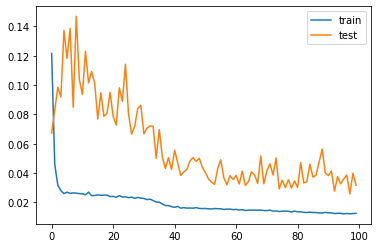

In [9]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
yhat_train = model.predict(train_X)
# print(yhat_train)
# print(train_y)

yhat_test = model.predict(test_X)
# print(yhat_test)
# print(test_y)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(df_dataset['date'][-n_test:], test_y, 'b-')
plt.plot(df_dataset['date'][-n_test:], yhat_test, 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Occupancy')
plt.title('Date vs. Occupancy');

No handles with labels found to put in legend.
